In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt


Accuracy: 0.9027624309392265
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.31      0.41        98

    accuracy                           0.90       905
   macro avg       0.76      0.64      0.68       905
weighted avg       0.89      0.90      0.89       905

[[787  20]
 [ 68  30]]


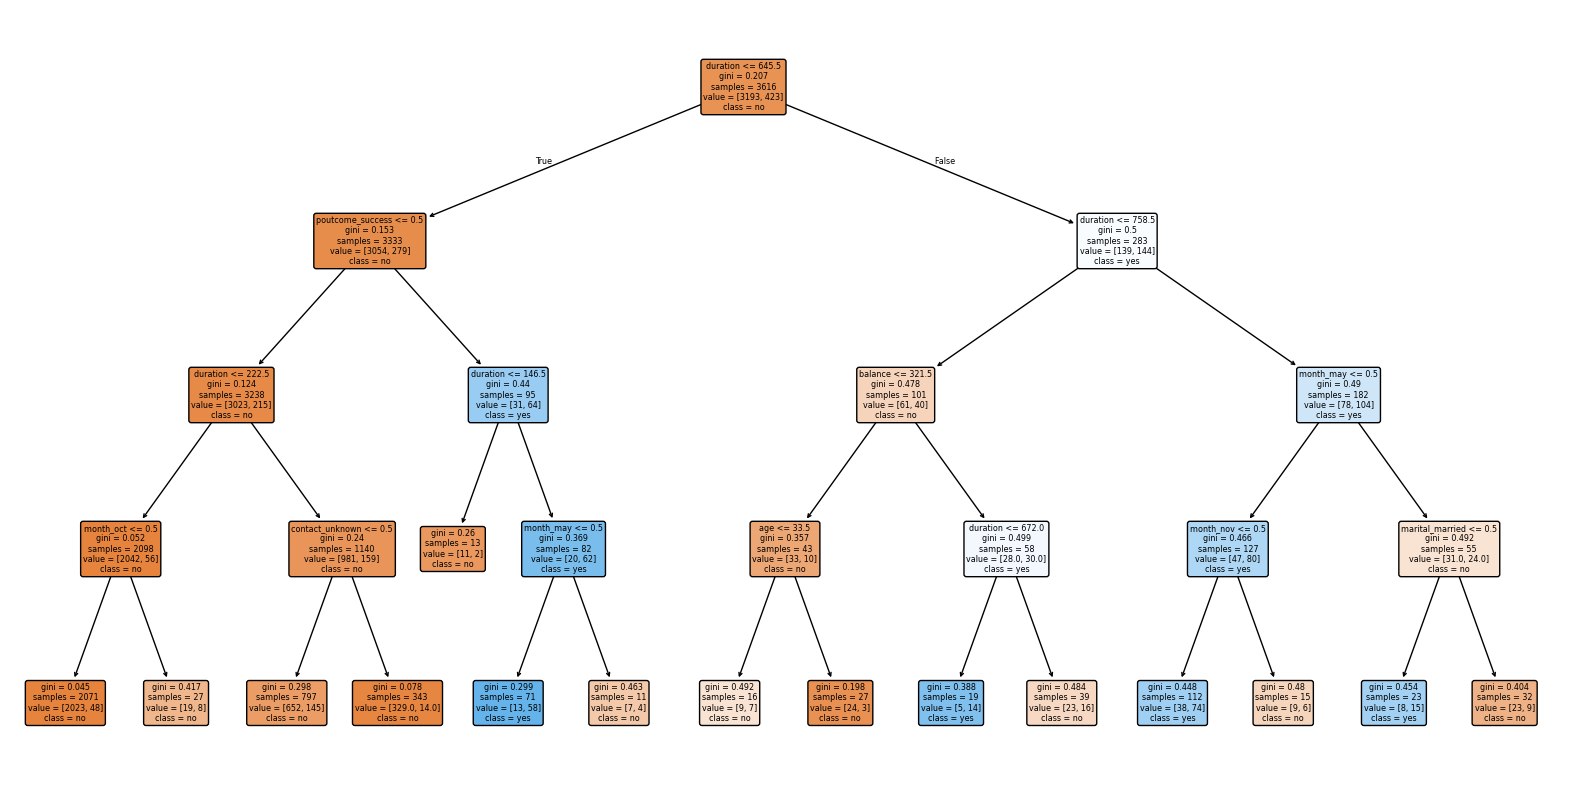

In [4]:
# Example: loading a CSV
df = pd.read_csv("bank.csv", sep=';')  

# (Optional) Convert target to binary
df['y'] = df['y'].map({'yes':1, 'no':0})

# Preprocess: one-hot encode categorical features
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)

X = df_encoded
y = df['y']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build tree
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['no','yes'], filled=True, rounded=True)
plt.show()
